In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


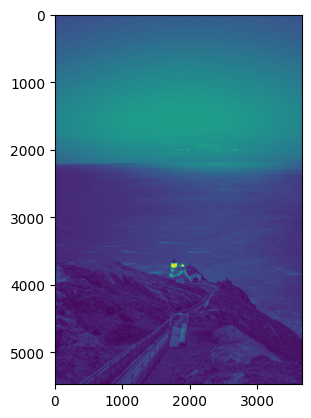

In [14]:
im_gray = cv.imread('img.JPG', cv.IMREAD_GRAYSCALE)
cv.imshow("",im_gray)
im_gray.shape
(thresh, im_bw) = cv.threshold(im_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
thresh = 127
im_bw = cv.threshold(im_gray, thresh, 255, cv.THRESH_BINARY)[1]
print(im_bw)
plt.imshow(im_gray)
